In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.min_rows = 1000
pd.options.display.max_rows = 1000
pd.set_option('display.max_columns', 100)

In [2]:
import torchvision.datasets as datasets

/home/mark/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /usr/local/lib/python3.10/dist-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [3]:
import torch
import math
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [4]:
import random

In [5]:
torch.cuda.is_available()

True

In [6]:
torch.cuda.device_count()

1

In [7]:
torch.cuda.current_device()

0

In [8]:
torch.cuda.device(0)

In [9]:
torch.cuda.get_device_name(0)

'NVIDIA RTX A2000 Laptop GPU'

## load MNIST data from torch

In [10]:
mnist_dataset_obj = datasets.MNIST('./data', train=True, download=True)

100%|████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 15992060.55it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 64917306.44it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 12196672.49it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 8384915.83it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [11]:
print(type(mnist_dataset_obj[0][0]))

<class 'PIL.Image.Image'>


In [17]:
mnist_dataset_obj[0][0]

In [ ]:
mnist_dataset_obj[0][1]

5

In [ ]:
transform = transforms.Compose([transforms.PILToTensor()])

In [ ]:
a_tensor = transform(mnist_dataset_obj[0][0])

In [ ]:
a_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
pd.DataFrame(a_tensor[0, :])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [ ]:
del a_tensor

In [18]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
                            ])

In [ ]:
a_tensor = transform(mnist_dataset_obj[0][0])

In [ ]:
a_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
a_tensor.view(-1, 28*28).shape

torch.Size([1, 784])

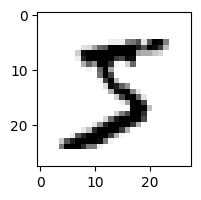

In [ ]:
fig, ax = plt.subplots(figsize=(2,2))
ax.imshow(a_tensor[0, :], cmap='gray_r')

In [62]:
n_epochs = 10
batch_size_train = 64
batch_size_test = 512
learning_rate = 0.01
logging_interval = 1
validation_percent = 0.2

## Create the dataloader objects

In [19]:
## Delete the object from above  
del mnist_dataset_obj

In [20]:
mnist_dataset_obj = datasets.MNIST('./data', train=True, download=True, transform=transform)

In [23]:
split = math.floor(len(mnist_dataset_obj)*validation_percent)
split

12000

In [24]:
tr_idxs = list(range(len(mnist_dataset_obj)))

In [25]:
# create dataloaders
train_data = DataLoader(mnist_dataset_obj, batch_size=batch_size_train, sampler=SubsetRandomSampler(tr_idxs[split:]))
valid_data = DataLoader(mnist_dataset_obj, batch_size=batch_size_test, sampler=SubsetRandomSampler(tr_idxs[:split]))

In [26]:
# dowload test data and create a dataloader
# load the test data
mnist_dataset_obj_test = datasets.MNIST('./data', train=False, download=True, transform=transform)
test_data = DataLoader(mnist_dataset_obj_test, batch_size = batch_size_test, shuffle = True)

tensor([[[4, 9, 4, 6, 1],
         [3, 9, 0, 9, 0],
         [4, 3, 0, 1, 9],
         [5, 7, 5, 2, 1],
         [3, 0, 8, 1, 1]]])


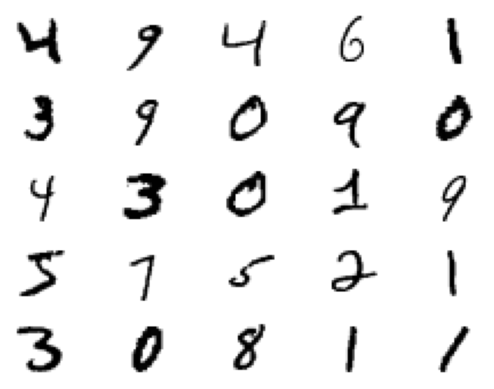

In [27]:
figure = plt.figure()
idxs = random.sample(range(50), 25)
print(train_data.dataset.targets[idxs].reshape(1,5,5) )
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(train_data.dataset.data[idxs[i]].numpy().squeeze(), cmap='gray_r')

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [52]:
def get_pct_correct():
    _, pred = outputs.data.cpu().topk(1, dim=1)
    pred = pred.t()
    pct_correct = (pred == batch[1]).sum().item() / pred.shape[1]
    return pct_correct

In [53]:
def build_confusion_matrix():
    
    #cf_matrix = confusion_matrix(y_true=[9,1,2,3,4,5,6,7,8,0,7,3], 
    #                             y_pred=[9,1,2,3,4,5,6,7,8,0,2,9], 
    #                             labels=[0,1,2,3,4,5,6,7,8,9])
    
    #return cf_matrix
    
    _, pred = outputs.data.cpu().topk(1, dim=1)
    pred = pred.t()
    
    classes = range(0,10)
    
    #return batch[1].shape[0], pred.view(-1).shape
    
    cf_matrix = confusion_matrix(batch[1], pred.view(-1), labels=range(0,10))
    
    
    df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix)*10, index = [i for i in classes], columns = [i for i in classes])
    plt.figure(figsize = (9,5))
    
    sn.heatmap(df_cm, annot=True)
    
#build_confusion_matrix()

In [68]:
# creating a Multinomial Logistic Regression classifier
class P(torch.nn.Module):

    def __init__(self, n_in, n_out):
        super(MLP, self).__init__()
        self.linear = torch.nn.Linear(n_in, n_out)

    def forward(self, x):
        return self.linear(x) # w @ x + b

In [63]:
# 3-layer feed forward nural network
class MLP(torch.nn.Module):

    def __init__(self, n_in, hidden_layer_f_size, n_out):
        super(MLP, self).__init__()
        self.input = torch.nn.Linear(n_in, hidden_layer_f_size)
        self.relu = torch.nn.ReLU()
        self.linear_hidden = torch.nn.Linear(hidden_layer_f_size, hidden_layer_f_size)
        self.out = torch.nn.Linear(hidden_layer_f_size, n_out)

    def forward(self, x):
        return self.out(self.relu(self.linear_hidden(self.relu(self.linear_hidden(self.relu(self.linear_hidden(self.relu(self.input(x)))))))))
        #return self.input(x)

In [64]:
del model

In [65]:
model = MLP(n_in=784, hidden_layer_f_size=100, n_out=10)

In [66]:
lossfn = torch.nn.CrossEntropyLoss(reduction='mean')

In [67]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Epoch: 0  |  TrLoss: 2.036699484839777  |  ValLoss: 0.9515777152517567  |  pct_correct: 0.75
Epoch: 1  |  TrLoss: 0.4854932977296959  |  ValLoss: 0.3465616171774657  |  pct_correct: 0.8883928571428571
Epoch: 2  |  TrLoss: 0.2981303584114095  |  ValLoss: 0.27384846949059033  |  pct_correct: 0.9375
Epoch: 3  |  TrLoss: 0.2288860675091737  |  ValLoss: 0.20997222221415976  |  pct_correct: 0.9464285714285714
Epoch: 4  |  TrLoss: 0.1841718927199874  |  ValLoss: 0.18375338808349942  |  pct_correct: 0.9375
Epoch: 5  |  TrLoss: 0.15307462717765802  |  ValLoss: 0.16022856177195258  |  pct_correct: 0.9419642857142857
Epoch: 6  |  TrLoss: 0.13190029253772845  |  ValLoss: 0.1441906152859978  |  pct_correct: 0.9598214285714286
Epoch: 7  |  TrLoss: 0.1157762832288072  |  ValLoss: 0.13204710768616718  |  pct_correct: 0.9508928571428571
Epoch: 8  |  TrLoss: 0.10082548203441664  |  ValLoss: 0.1256617401605067  |  pct_correct: 0.9553571428571429
Epoch: 9  |  TrLoss: 0.09064390831247708  |  ValLoss: 0.119

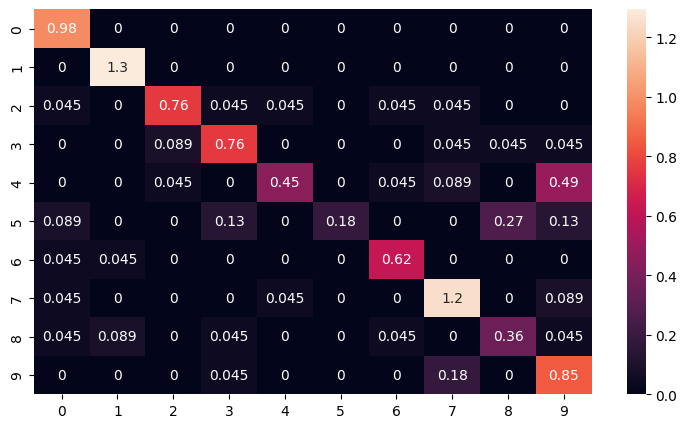

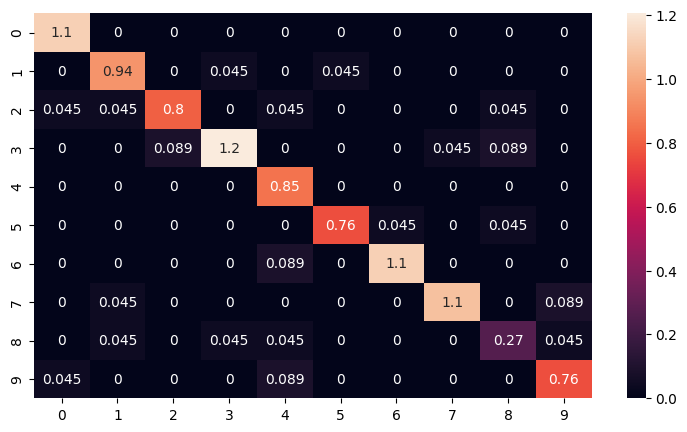

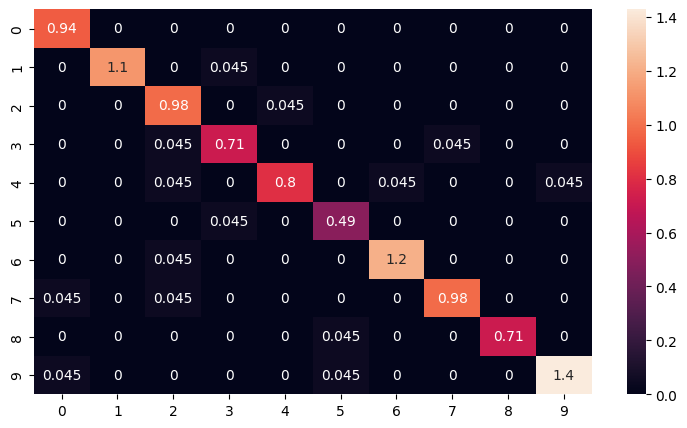

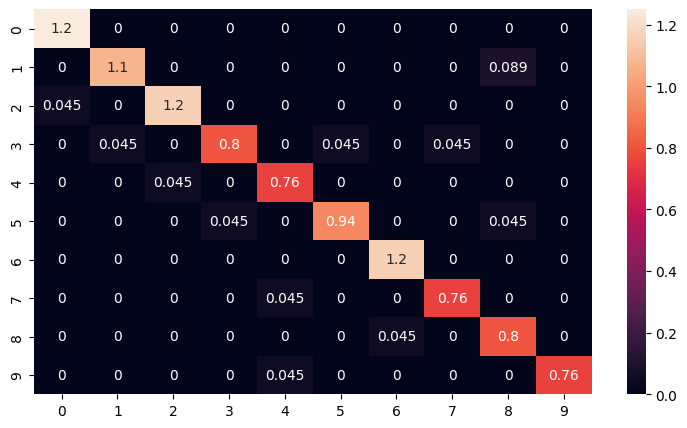

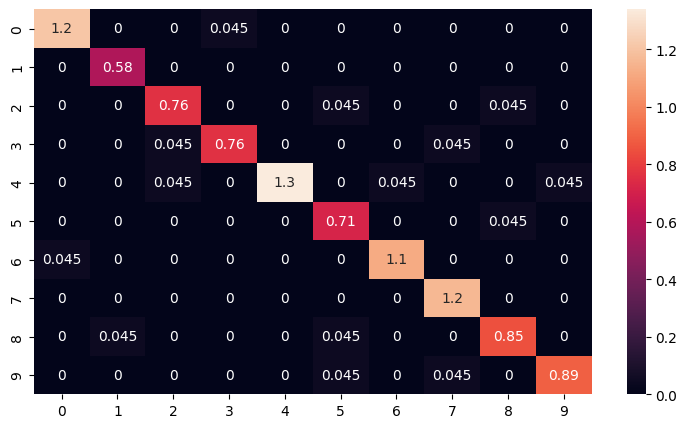

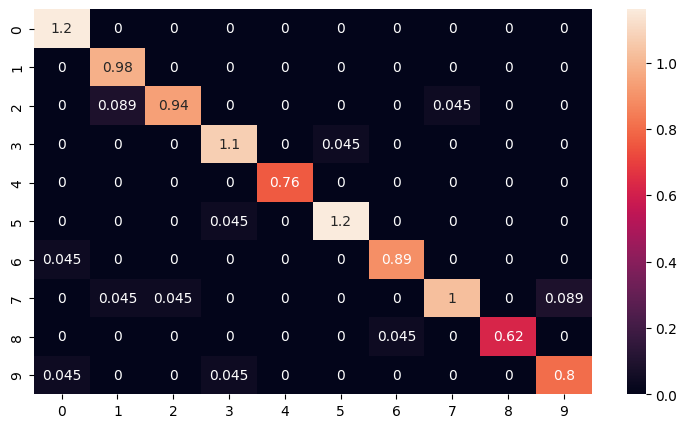

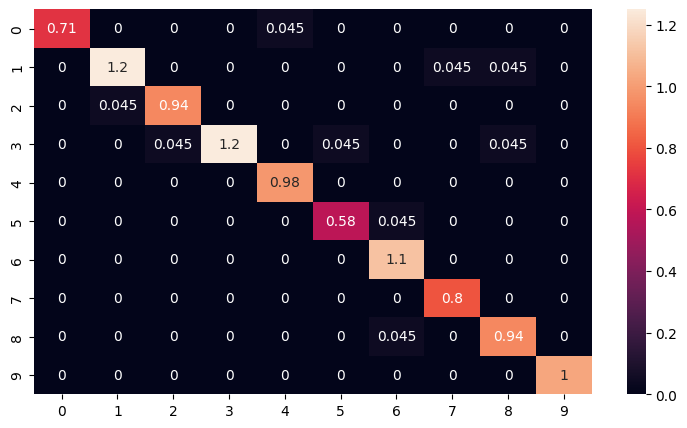

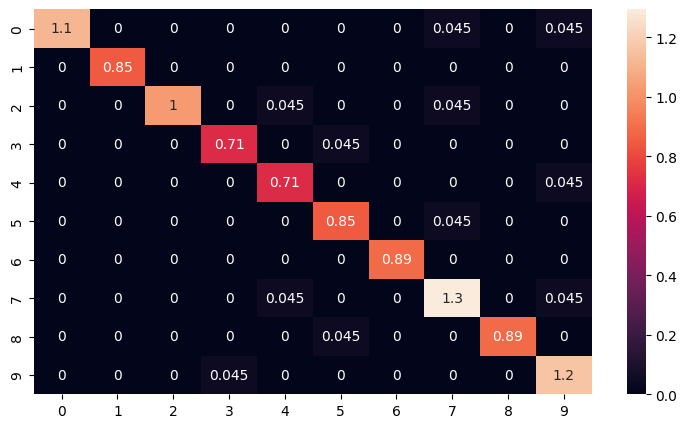

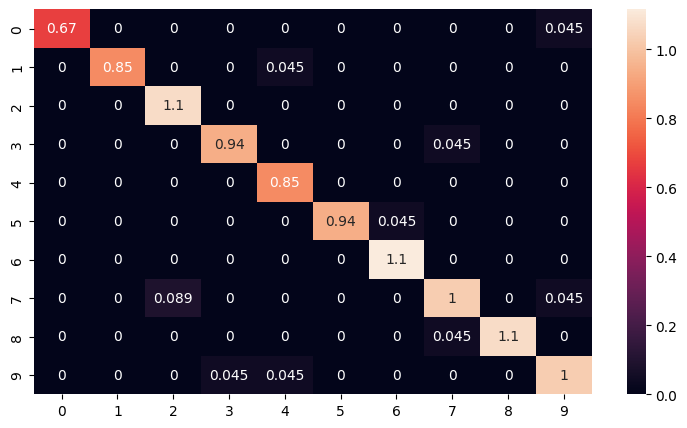

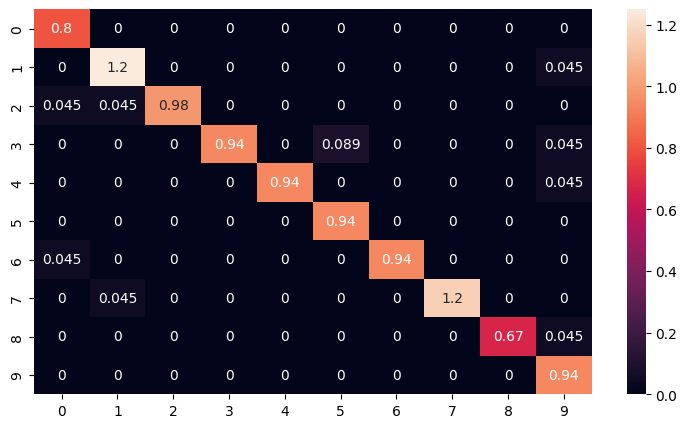

In [68]:
for e in range(n_epochs): # goes over the entire dataset at each iteration
    tr_loss = 0
    # training step
    model.train() # track gradients
    for idxtr, batch in enumerate(train_data, 0): # iterating over mini-batches
        optimizer.zero_grad()
        outputs = model(batch[0].view(-1,784)) # [0] will get the input x from the mini-batch
        loss = lossfn(outputs, batch[1]) # [1] will get the output y from the mini-batch
        loss.backward() # calculates gradients
        optimizer.step() # performs gradient descent update
        tr_loss += loss.item()
    # validation step
    model.eval() # no need to track gradients
    with torch.no_grad():
        val_loss = 0
        for idxva, batch in enumerate(valid_data, 0):
            outputs = model(batch[0].view(-1,784))
            loss = lossfn(outputs, batch[1])
            val_loss += loss.item()
            pct_correct = get_pct_correct()
    # print some stats
    if e % logging_interval == 0:
        print(f'Epoch: {e}  |  TrLoss: {tr_loss/idxtr}  |  ValLoss: {val_loss/idxva}  |  pct_correct: {pct_correct}')
        build_confusion_matrix()